#### Import Library

In [1]:
import sys
sys.path.append("../modules")
from eda import EDAAnalyzer
from spark_session import SparkManager
from feature_engineering import FeatureEngineer
from pyspark import StorageLevel

In [2]:
# Load autoreload extension
%load_ext autoreload
%autoreload 2

#### Constants and config

In [3]:
mx_submits_path = "../data_sample/mx_submits.parquet/"
mx_submits_line_path = "../data_sample/mx_submitsline.parquet/"


sample_patient_id = "8aad41f612a7095449888c8050abaeb05fdee65643caa3033542610421d8bd1daaa2c4ce1757401003a1bbcd60948a7aa13eba507a676dea80e0cf76b77dbc95"
features_cols = ['secondary_payer_state',
'billing_provider_address_precision',
'billing_provider_address_region',
'claim_filing_indicator_pay_type',
'claim_institutional_or_professional',
'facility_provider_address_precision',
'facility_provider_address_region',
'inpatient_discharge_status_code',
'organization_npi_type_code',
'organization_sourced_from',
'organization_taxonomy_group',
'patient_gender',
'patient_id',
'patient_location_residential_region',
'primary_payer_pay_type',
'primary_payer_plan_type',
'principal_diagnosis_body_part',
'principal_diagnosis_category',
'principal_diagnosis_code_set',
'principal_procedure_code_set',
'referring_provider_taxonomy_group',
'rendering_provider_npi_type_code',
'rendering_provider_taxonomy_group',
'secondary_payer_claim_filing_indicator_code',
'secondary_payer_pay_type',
'secondary_payer_plan_type',
'claim_all_diagnosis_codes',
'claim_total_charge_amount',
'previous_line_level_procedure_ohe',
'line_level_procedures_ohe']
exclude_cols = ['patient_id']
label_column = 'claim_total_charge_amount'
most_repeated_diagnosis_list = [] 

### Spark Session

In [4]:
mx_submits_spark_manager = SparkManager(mx_submits_path)
mx_submits_line_spark_manager = SparkManager(mx_submits_line_path)

24/10/16 22:06:08 WARN Utils: Your hostname, Chaopings-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 10.0.0.231 instead (on interface en0)
24/10/16 22:06:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/16 22:06:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Mx submits

#### EDA

In [5]:
mx_submits_eda = EDAAnalyzer(mx_submits_spark_manager)

In [6]:
mx_submits_eda.display_head()

24/10/16 22:06:11 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,claim_number,cohort_key,cohort_record_id,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,...,type_of_bill_frequency_description,vendorname,cycle_id,patient_birth_year,patient_gender,patient_id,patient_location_preferred_latitude,patient_location_preferred_longitude,patient_location_preferred_zipcode,patient_location_preferred_type
0,d15bd78f4275d493fa9c2d862fb24863,767ef4cac69e8a0c77384f6e1414364b,6645d6e8ede891a875ae96bc91188fa5,None,"MIAMI-FORT LAUDERDALE-POMPANO BEACH, FL",Pembroke Pines,Broward,703NFLAMINGORDPEMBROKEPINESFL33028,26.012682,-80.310287,...,None,cyan,full_20240611,2016,F,cbed99ab51c5c26aadb1c69fef5cb48e15be94c0c16004...,26.012682,-80.310287,33026,1
1,135e6c968a8d39fc4c406d5c51a02f1e,0e6b9e4a0d9103c5a9c4f1332d38ef53,8080db10ebbe9960957f86b4c1e32c74,None,"MIAMI-FORT LAUDERDALE-POMPANO BEACH, FL",Miami,Miami-Dade,2600SDOUGLASRDMIAMIFL33134,25.742325,-80.254471,...,Admit Through Discharge Claim,cyan,full_20240611,1964,F,64bf25c773a8078105e391d5074923304156b5dc6460a3...,28.05644,-82.451753,33612,1
2,c8e11f355938d80212d189e9a0d0d7dc,f74909ace68e51891440e4da0b65a70c,9daf9e9e56d51c24c3cce85e815cdba6,None,"VINCENNES, IN",Vincennes,Knox,1160ESAINTCLAIRSTVINCENNESIN47591,38.680187,-87.510361,...,None,cyan,full_20240611,1963,F,d5f343e39f9abc8e1745ca0aecea3d36767894f91b642d...,38.242580,-87.513318,47648,2
3,f355cc2efcb05a35300b17d9d21d0c48,f74909ace68e51891440e4da0b65a70c,e9927f4874d77b12e469424fb2ff2b44,1790224699,None,None,None,None,None,None,...,Admit Through Discharge Claim,cyan,full_20240611,1932,M,fc5cd962003e6f173cf70c2d1917a5cc163823d6dd9be8...,35.170105,-89.751358,38016,1
4,5b2f2a5f5145af513cf79e43c36053ef,0e6b9e4a0d9103c5a9c4f1332d38ef53,9f35dd46aeed03cf4017e0cb9b0d93ee,None,"BALTIMORE-COLUMBIA-TOWSON, MD",Rosedale,Baltimore,9000FRANKLINSQUAREDRROSEDALEMD21237,39.351406,-76.480293,...,Admit Through Discharge Claim,cyan,full_20240611,1986,F,d29bb1d24b6ad3d5ca22c0f74f36d069119228227e8e02...,39.287311,-76.491821,21224,1


In [7]:
mx_submits_eda.display_shape()

'Shape of data: rows: 124217, cols: 127'

#### Type conversion

In [8]:
mx_submits_eda.convert_columns_to_float(["claim_total_charge_amount"])

Casted claim_total_charge_amount to float


column_info_submits = mx_submits_eda.display_column_info()
column_info_submits.to_csv("../output/column_info_submits.csv")
column_info_submits

column_info_submits[column_info_submits["Column Name"]=="claim_total_charge_amount"]

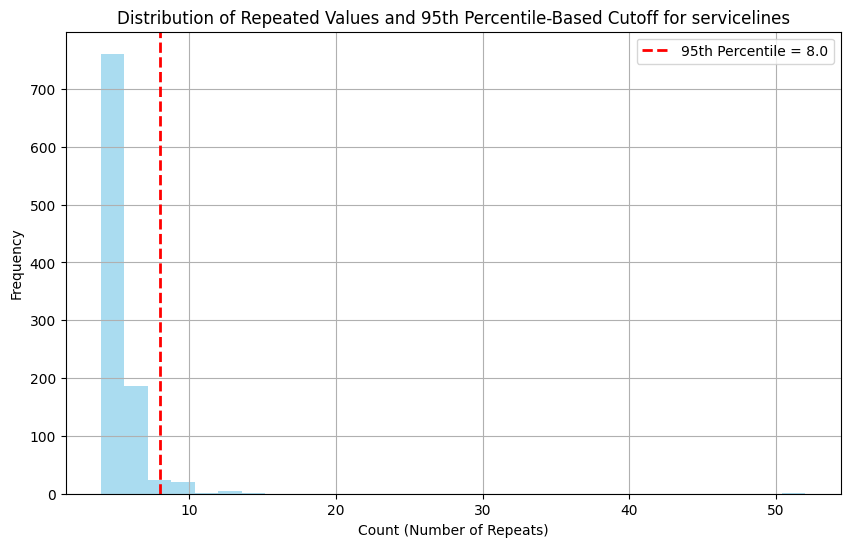

In [9]:
mx_submits_eda.plot_percentile_based_procedure_cutoff("servicelines",95)

In [11]:
mx_submits_line_level_procedure_codes_repeat_count = mx_submits_eda.get_top_n_repeated_procedures_unique_per_patient("servicelines")

In [12]:
most_repeated_procedures = mx_submits_line_level_procedure_codes_repeat_count[
    (mx_submits_line_level_procedure_codes_repeat_count["count"] > 70)
]
most_repeated_procedure_list = most_repeated_procedures['line_level_procedure_code'].tolist()
most_repeated_procedures

,line_level_procedure_code,count,line_level_procedure_code_length
0,99213,1648,5.0
1,99214,1381,5.0
2,99203,1100,5.0
3,36415,1010,5.0
4,85025,952,5.0
...,...,...,...
274,84520,71,5.0
275,70486,71,5.0
276,86038,71,5.0
277,70553,71,5.0


### MX SUBMITS LINE

#### EDA

In [13]:
mx_submits_line_eda = EDAAnalyzer(mx_submits_line_spark_manager)

In [14]:
mx_submits_line_eda.display_head()

,attending_provider_npi,billing_provider_address_cbsa_name,billing_provider_address_city,billing_provider_address_county,billing_provider_address_key,billing_provider_address_latitude,billing_provider_address_longitude,billing_provider_address_precision,billing_provider_address_region,billing_provider_address_state,...,line_level_procedure_modifier_1,line_level_procedure_modifier_2,line_level_procedure_modifier_3,line_level_procedure_modifier_4,line_level_procedure_category,line_level_revenue_code,line_level_revenue_description,line_level_from_date,line_level_to_date,line_level_units_billed
0,None,"FLINT, MI",Flint,Genesee,2222SLINDENRDFLINTMI48532,42.996639,-83.773331,Rooftop,Midwest,MI,...,None,None,None,None,None,0270,None,2023-04-24,2023-04-24,1.00
1,None,None,None,None,None,None,None,None,None,None,...,95,None,None,None,EVALUATION AND MANAGEMENT - NON-FACE-TO-FACE P...,None,None,2022-12-20,2022-12-20,1.00
2,None,"NEW YORK-NEWARK-JERSEY CITY, NY-NJ-PA",Richmond Hill,Queens,1302089THRDRICHMONDHILLNY11418,40.699558,-73.820145,Rooftop,Northeast,NY,...,None,None,None,None,None,0529,Free-Standing Clinic,2016-09-20,2016-09-20,1.00
3,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,2019-07-09,2019-07-09,1.00
4,None,"NEW YORK-NEWARK-JERSEY CITY, NY-NJ-PA",Clark,Union,1180RARITANRDCLARKNJ07066,40.63044,-74.311783,Rooftop,Northeast,NJ,...,GP,59,None,None,MEDICINE - PHYSICAL MEDICINE AND REHABILITATION,None,None,2022-10-24,2022-10-24,1.00


In [15]:
mx_submits_line_eda.display_shape()

'Shape of data: rows: 329307, cols: 150'

#### Feature Engineering

In [16]:
mx_submits_fe=FeatureEngineer(mx_submits_spark_manager)

In [17]:
mx_submits_fe.transform_line_level_procedure_codes()

,line_level_procedures_ohe
0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [18]:
mx_submits_fe.add_procedures_with_exponential_decay_sparse_vector()

DataFrame After Adding Previous Procedures OHE with Exponential Decay - Shape: 124217 rows, 132 columns


In [19]:
mx_submits_fe.add_continuous_visit_years()
mx_submits_fe.display_top_rows_as_pandas("continuous_visit_years")

,continuous_visit_years
0,1
1,1
2,1
3,1
4,1


In [20]:
mx_submits_fe.retain_columns(features_cols)

In [21]:
mx_submits_fe.convert_columns_to_float(["claim_total_charge_amount"])
preprocess_data = mx_submits_fe.preprocess_procedure_data(exclude_cols=exclude_cols)
preprocess_data

Casted claim_total_charge_amount to float


One-Hot Encoding applied successfully to column: secondary_payer_state
One-Hot Encoding applied successfully to column: billing_provider_address_precision
One-Hot Encoding applied successfully to column: billing_provider_address_region
One-Hot Encoding applied successfully to column: claim_filing_indicator_pay_type
One-Hot Encoding applied successfully to column: claim_institutional_or_professional
One-Hot Encoding applied successfully to column: facility_provider_address_precision
One-Hot Encoding applied successfully to column: facility_provider_address_region
One-Hot Encoding applied successfully to column: inpatient_discharge_status_code
One-Hot Encoding applied successfully to column: organization_npi_type_code
One-Hot Encoding applied successfully to column: organization_sourced_from
One-Hot Encoding applied successfully to column: organization_taxonomy_group
One-Hot Encoding applied successfully to column: patient_gender
One-Hot Encoding applied successfully to column: patient_l

In [22]:
columns_df = mx_submits_fe.get_columns_as_pandas_df()
columns_df['Column Names'].to_list()
feature_cols = mx_submits_fe.get_feature_columns()
feature_cols

['secondary_payer_state_ohe',
 'billing_provider_address_precision_ohe',
 'billing_provider_address_region_ohe',
 'claim_filing_indicator_pay_type_ohe',
 'claim_institutional_or_professional_ohe',
 'facility_provider_address_precision_ohe',
 'facility_provider_address_region_ohe',
 'inpatient_discharge_status_code_ohe',
 'organization_npi_type_code_ohe',
 'organization_sourced_from_ohe',
 'organization_taxonomy_group_ohe',
 'patient_gender_ohe',
 'patient_location_residential_region_ohe',
 'primary_payer_pay_type_ohe',
 'primary_payer_plan_type_ohe',
 'principal_diagnosis_body_part_ohe',
 'principal_diagnosis_category_ohe',
 'principal_diagnosis_code_set_ohe',
 'principal_procedure_code_set_ohe',
 'referring_provider_taxonomy_group_ohe',
 'rendering_provider_npi_type_code_ohe',
 'rendering_provider_taxonomy_group_ohe',
 'secondary_payer_claim_filing_indicator_code_ohe',
 'secondary_payer_pay_type_ohe',
 'secondary_payer_plan_type_ohe',
 'claim_total_charge_amount']

In [23]:
#mx_submits_fe.dataframe.persist(StorageLevel.MEMORY_AND_DISK)

In [24]:
#mx_submits_fe.reduce_dataframe_size()
#mx_submits_fe.train_autoencoder(10)

In [25]:
#mx_submits_fe.save_autoencoder("../output/model")

In [26]:
mx_submits_fe.load_autoencoder("../output/model")

Autoencoder model loaded and recompiled from ../output/model/autoencoder.h5
Encoder model loaded from ../output/model/encoder.h5


In [27]:
mx_submits_fe.create_procedure_feature_name_map()

In [28]:
feature_impact = mx_submits_fe.evaluate_feature_impact()
feature_impact

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step


,Feature Index,Impact,Feature Name
0,238,0.194858,line_level_procedure_J7120
1,204,0.189876,line_level_procedure_99490
2,114,0.181391,line_level_procedure_43246
3,265,0.171521,line_level_procedure_82570
4,237,0.168426,line_level_procedure_87075
...,...,...,...
327,141,0.010738,line_level_procedure_74177
328,102,0.010576,line_level_procedure_J1100
329,228,0.010545,line_level_procedure_87624
330,259,0.010154,line_level_procedure_52000


In [29]:
feature_impact["Feature Name"].to_list()[:300]

['line_level_procedure_J7120',
 'line_level_procedure_99490',
 'line_level_procedure_43246',
 'line_level_procedure_82570',
 'line_level_procedure_87075',
 'line_level_procedure_0Y6D0Z3',
 'line_level_procedure_99223',
 'line_level_procedure_96137',
 'line_level_procedure_92134',
 'line_level_procedure_G8730',
 'line_level_procedure_97153',
 'line_level_procedure_90648',
 'line_level_procedure_90853',
 'line_level_procedure_1036F',
 'line_level_procedure_97018',
 'line_level_procedure_99497',
 'line_level_procedure_B410YZZ',
 'line_level_procedure_G2067',
 'line_level_procedure_80363',
 'line_level_procedure_52214',
 'line_level_procedure_80353',
 'line_level_procedure_73560',
 'line_level_procedure_86225',
 'line_level_procedure_17110',
 'line_level_procedure_4554F',
 'line_level_procedure_72110',
 'line_level_procedure_20526',
 'line_level_procedure_90685',
 'line_level_procedure_G0153',
 'line_level_procedure_91301',
 'line_level_procedure_86800',
 'line_level_procedure_96130',
 'li

In [30]:
mx_submits_fe.retain_columns(features_cols+[label_column])